 # EECS 3415 Project

# Authors: Hulya Yasar , 

**Original Dataset Source: Cortez,Paulo. (2014). Student Performance. UCI Machine Learning Repository. https://www.kaggle.com/code/imakash3011/water-quality-prediction-7-model/input**


**Modified Dataset: Water Quality Prediction https://github.com/Verma-Aakanksha/EECS3401-Project/blob/master/water_potability.csv**

# About dataset

**Content**
The water_potability.csv file contains water quality metrics for 3276 different water bodies.

**1. pH Value:** pH is a critical measure of water's acidity or alkalinity, with the WHO recommending a pH range of 6.5 to 8.5. In this study, pH levels fell within the WHO's standards, ranging from 6.52 to 6.83.

**2. Hardness:** Hardness in water is primarily caused by calcium and magnesium salts, originating from geological deposits. The time water spends in contact with such materials determines its hardness, affecting its ability to form soap precipitates.

**3. Solids (Total Dissolved Solids - TDS):** TDS measures the capacity of water to dissolve inorganic and some organic minerals and salts, potentially affecting the taste and appearance of water. The recommended TDS limits for drinking water are 500 mg/l (desirable) and 1000 mg/l (maximum).

**4. Chloramines:** Chlorine and chloramine serve as major disinfectants in public water systems, with chloramines commonly formed by adding ammonia to chlorine for water treatment. Chlorine levels up to 4 mg/L are considered safe in drinking water.

**5. Sulfate:** Sulfates are naturally occurring substances found in minerals, soil, and rocks. They can be present in various environmental sources. In seawater, sulfate concentrations are around 2,700 mg/L, while most freshwater supplies contain 3 to 30 mg/L, though higher levels can be found in certain locations.

**6. Conductivity:** Conductivity measures the ability of water to conduct electrical current, with ion concentration influencing it. Higher dissolved solids increase electrical conductivity. The WHO recommends an electrical conductivity value not exceeding 400 μS/cm.

**7. Organic Carbon:** Total Organic Carbon (TOC) in water originates from decaying natural organic matter and synthetic sources. The US EPA sets limits of < 2 mg/L for treated/drinking water and < 4 mg/L for source water used for treatment.

**8. Trihalomethanes (THMs):** THMs are chemicals that can be found in water treated with chlorine. The concentration of THMs in drinking water varies based on organic material levels, chlorine dosage, and water temperature. THM levels up to 80 ppm are considered safe in drinking water.

**9. Turbidity:** Turbidity depends on the presence of solid matter in water in a suspended state. It measures water's ability to emit light and indicates the quality of waste discharge with respect to colloidal matter. The mean turbidity value for Wondo Genet Campus (0.98 NTU) is below the WHO's recommended value of 5.00 NTU.

**10. Potability:** This parameter indicates whether water is safe for human consumption, with "1" representing potable water and "0" indicating non-potable water.

# 1- Look at the big picture and frame the problem.

### Frame the problem
1. Supervised learning – training examples are labeled.
2. A regression task – predict a value.
3. Batch learning 
    - Small data set
    - No continuous flow of data coming into the system
    - No need to adjust to changing data rapidly

### Look at the big picture
Predictions will be used to help inform people if the body of water is drinkable. This will be done through the following properties of the water: pH value, hardness, solids, chloramines, sulfate, conductivity, organic carbon, trihalomethanes, turbidity.

In [25]:
# Import libraries

import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


# 2- Load the dataset

Open the dataset using Pandas and load it into a DataFrame, which is the object Pandas uses to store tables of data.
Pandas uses two objects for storing datasets: the DataFrame and the Series. 
Series is used for datasets with only one column, and DataFrame is used for datasets of more than one column.

In [27]:

url = "https://raw.githubusercontent.com/Verma-Aakanksha/EECS3401-Project/master/water_potability.csv"
df = pd.read_csv(url)

In [28]:
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [29]:
# Getting top 5 row of the dataset

df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [30]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [32]:
df.sample(5)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3012,7.795558,136.090677,26484.515316,7.555320,426.500022,471.413356,14.544948,51.491197,3.629252,0
45,5.702926,216.850474,35606.440177,7.184351,NaN,504.638260,16.140790,77.536184,4.137739,0
620,NaN,183.464853,19998.859019,7.151889,337.539533,294.846802,10.088668,66.299162,4.183320,0
545,NaN,179.149287,4784.967879,5.702187,378.398218,517.496142,14.387224,68.687024,2.380084,0
3004,7.992750,193.609138,14610.412832,7.218904,332.468755,468.602998,10.877062,67.181341,4.062907,0


In [33]:
df.shape

(3276, 10)

In [34]:
df.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [35]:
#finding the correlation
df.corr()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.082096,-0.089288,-0.034350,0.018203,0.018614,0.043503,0.003354,-0.039057,-0.003556
Hardness,0.082096,1.000000,-0.046899,-0.030054,-0.106923,-0.023915,0.003610,-0.013013,-0.014449,-0.013837
Solids,-0.089288,-0.046899,1.000000,-0.070148,-0.171804,0.013831,0.010242,-0.009143,0.019546,0.033743
Chloramines,-0.034350,-0.030054,-0.070148,1.000000,0.027244,-0.020486,-0.012653,0.017084,0.002363,0.023779
Sulfate,0.018203,-0.106923,-0.171804,0.027244,1.000000,-0.016121,0.030831,-0.030274,-0.011187,-0.023577
Conductivity,0.018614,-0.023915,0.013831,-0.020486,-0.016121,1.000000,0.020966,0.001285,0.005798,-0.008128
Organic_carbon,0.043503,0.003610,0.010242,-0.012653,0.030831,0.020966,1.000000,-0.013274,-0.027308,-0.030001
Trihalomethanes,0.003354,-0.013013,-0.009143,0.017084,-0.030274,0.001285,-0.013274,1.000000,-0.022145,0.007130
Turbidity,-0.039057,-0.014449,0.019546,0.002363,-0.011187,0.005798,-0.027308,-0.022145,1.000000,0.001581
Potability,-0.003556,-0.013837,0.033743,0.023779,-0.023577,-0.008128,-0.030001,0.007130,0.001581,1.000000


# BLOCK-2 (DATA VISUALLIZATION)

<Axes: xlabel='Hardness', ylabel='Count'>

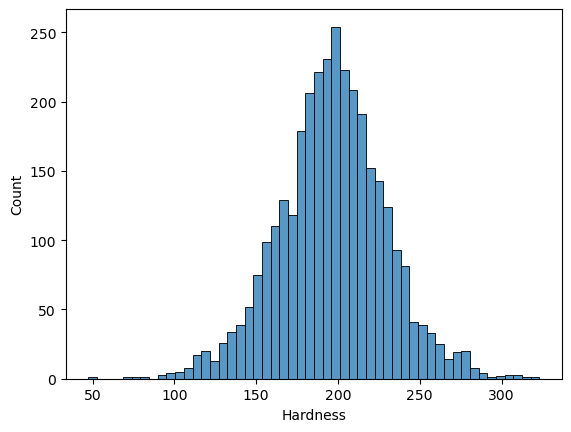

In [36]:
sns.histplot(df['Hardness'])

<Axes: xlabel='ph', ylabel='Count'>

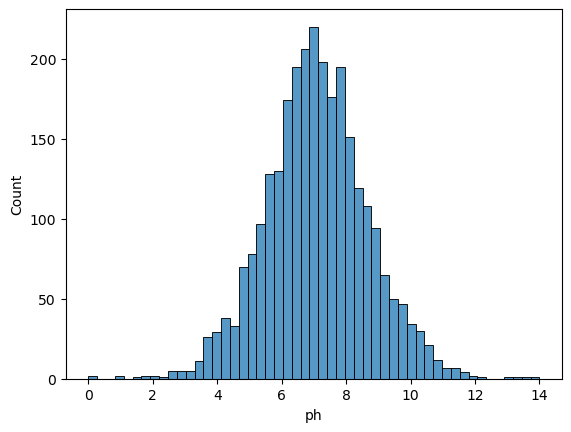

In [37]:
sns.histplot(df['ph'])

<Axes: >

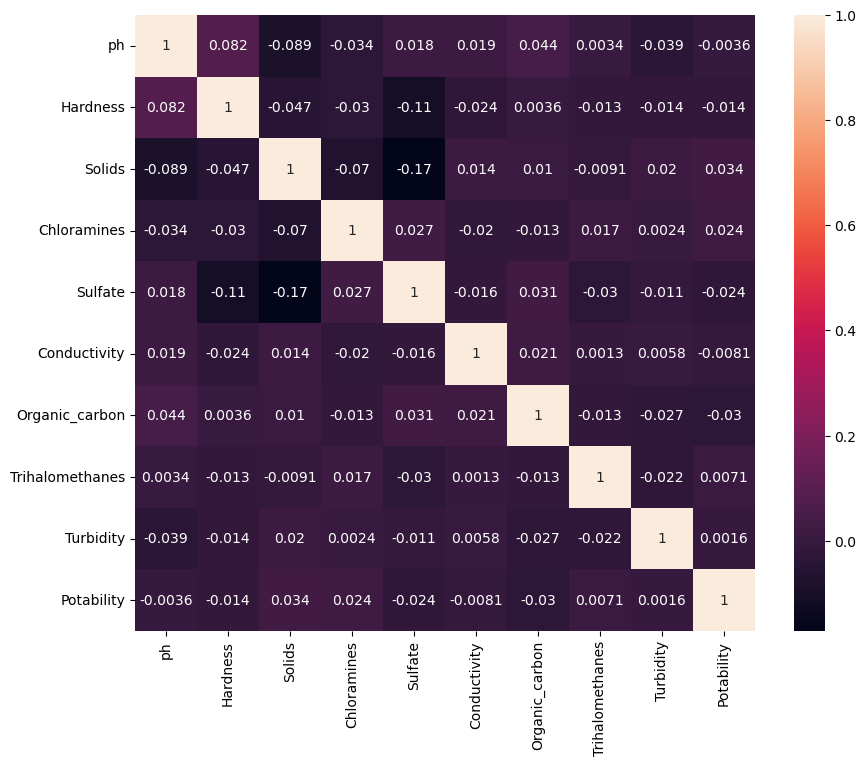

In [38]:
#plotting the heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,cmap=None)

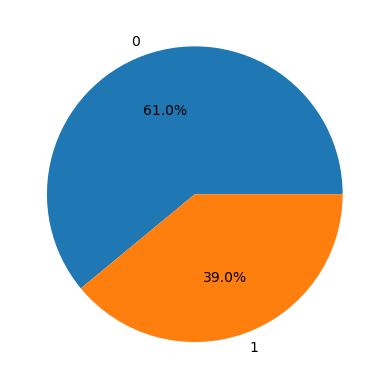

In [39]:
plt.pie(df['Potability'].value_counts(),labels = list(df['Potability'].unique()),autopct="%0.1f%%" )
plt.show()